# Space Data

This is a basic notebook to pull back some of the NASA open API data as a demonstration of what you can do with this data. Tp get an api key, and to see what data is available, go to https://api.nasa.gov

### Import libraries and set up the API key

In [30]:
import requests
import time
import json
import os
from IPython.display import Image
from datetime import date

today = date.today()
print("Today's date:", today)
my_api='YOUR API KEY HERE'

Today's date: 2021-02-01


# Astronomy Picture of the Day

This is a collection of images that you can use in projects - you get a new image every day.

### Set up the functions

These are just pulled from the API examples on the NASA site.

In [31]:
def get_apod_data(api_key):
    raw_response = requests.get(f'https://api.nasa.gov/planetary/apod?api_key={api_key}').text
    response = json.loads(raw_response)
    return response

In [32]:
def download_image(url, date):
    if os.path.isfile(f'{date}.png') == False:
        raw_image = requests.get(url).content
        with open(f'{date}.jpg', 'wb') as file:
            file.write(raw_image)
            
    else:
        return FileExistsError

### Pull back the current day's image & description

Just as an example of what you can do - this pulls back the current date's image and NASA's description of what the image shows.

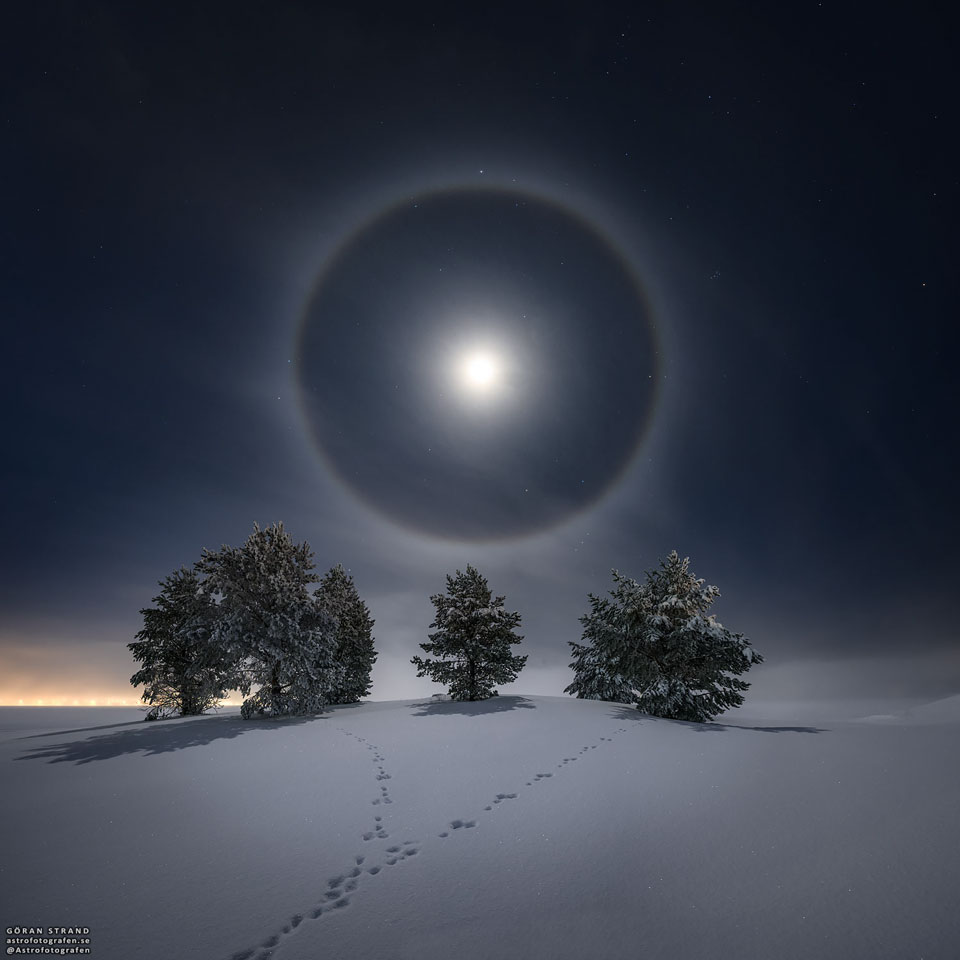

In [33]:
apod_data = get_apod_data(my_api)
download_image(apod_data['url'], apod_data['date'])
file_name = apod_data['date'] + '.jpg'
apod_img = Image(file_name, width = 300, height = 150)
display(apod_img)

In [34]:
print(apod_data['explanation'])

Have you ever seen a halo around the Moon?  This fairly common sight occurs when high thin clouds containing millions of tiny ice crystals cover much of the sky.  Each ice crystal acts like a miniature lens.  Because most of the crystals have a similar elongated hexagonal shape, light entering one crystal face and exiting through the opposing face refracts 22 degrees, which corresponds to the radius of the Moon Halo.  A similar Sun Halo may be visible during the day.  Exactly how ice-crystals form in clouds remains a topic of research. In the featured image taken last week from Östersund, Sweden, a complete lunar halo was captured over snowy trees and rabbit tracks.   APOD is available via Instagram: in English, Indonesian, Persian, and Portuguese


# Mars Weather Data

Yes - the actual weather on actual Mars!

### Set up the function

This is just a copy of the function from the picture of the day code above, with the API bit changed so that it's looking at the Mars weather API.

In [35]:
def get_mars_weather_data(api_key):
    raw_response = requests.get(f'https://api.nasa.gov/insight_weather/?api_key={api_key}&feedtype=json&ver=1.0').text
    response = json.loads(raw_response)
    return response

### Pull back the API data

First we'll pull back the full API data just to have a look.

In [36]:
mars_weather = get_mars_weather_data(my_api)
print(mars_weather)

{'770': {'First_UTC': '2021-01-25T09:13:11Z', 'Last_UTC': '2021-01-26T09:52:42Z', 'Month_ordinal': 12, 'Northern_season': 'late winter', 'PRE': {'av': 712.914, 'ct': 75986, 'mn': 691.5213, 'mx': 734.9605}, 'Season': 'winter', 'Southern_season': 'late summer', 'WD': {'most_common': None}}, '771': {'First_UTC': '2021-01-26T09:52:46Z', 'Last_UTC': '2021-01-27T10:32:17Z', 'Month_ordinal': 12, 'Northern_season': 'late winter', 'PRE': {'av': 715.602, 'ct': 88778, 'mn': 692.746, 'mx': 737.3223}, 'Season': 'winter', 'Southern_season': 'late summer', 'WD': {'most_common': None}}, '772': {'First_UTC': '2021-01-27T10:32:21Z', 'Last_UTC': '2021-01-28T11:11:52Z', 'Month_ordinal': 12, 'Northern_season': 'late winter', 'PRE': {'av': 719.71, 'ct': 73112, 'mn': 689.896, 'mx': 736.549}, 'Season': 'winter', 'Southern_season': 'late summer', 'WD': {'most_common': None}}, '773': {'First_UTC': '2021-01-28T11:11:56Z', 'Last_UTC': '2021-01-29T11:51:27Z', 'Month_ordinal': 12, 'Northern_season': 'late winter', 

So not that human friendly, but from a quick look at the API documentation I can see it's split into individual  sol (Mars day) collections, for the last 7 sols, and that there's a sol_keys field in there.  Given that Mars sols are different to Earth days, and the last sol could be a partial collection of data, I'll assume we take the second last sol to get as full a list of data as possible.

In [37]:
last_sol = mars_weather['sol_keys'][-2]
print(mars_weather[last_sol])

{'First_UTC': '2021-01-28T11:11:56Z', 'Last_UTC': '2021-01-29T11:51:27Z', 'Month_ordinal': 12, 'Northern_season': 'late winter', 'PRE': {'av': 717.952, 'ct': 79088, 'mn': 693.9911, 'mx': 736.3956}, 'Season': 'winter', 'Southern_season': 'late summer', 'WD': {'most_common': None}}


So that's much more readable - then just as an example I'll pull that out into some text data.

Note - in the API documentation we should also expect temperature and wind direction data, but we're not seeing that here.

In [38]:
mars_month = mars_weather[last_sol]['Month_ordinal']
mars_north_season = mars_weather[last_sol]['Northern_season']
mars_south_season = mars_weather[last_sol]['Southern_season']
mars_ave_pressure = mars_weather[last_sol]['PRE']['av']

In [40]:
print('It is month ' + str(mars_month) + ' on mars, in the northern hemispehere it is \n' + mars_north_season + ' and in the southern hemisphere it is ' + mars_south_season + '.')
print('Average pressure on sol ' + last_sol + ' was ' + str(mars_ave_pressure) + 'Pa.')

It is month 12 on mars, in the northern hemispehere it is 
late winter and in the southern hemisphere it is late summer.
Average pressure on sol 773 was 717.952Pa.
